In [1]:
#Import packages we need run our code
import numpy as np #Numpy is used to store values (in numpy arrays)
#/and generate (pseudo) random draws from a normal distribution. Numpy is extreme fast as it essentially run on C++ code.
import matplotlib.pyplot as plt #pyplot is used to plot the data
import pandas as pd #Pandas is a great package to store multiple time series
import seaborn as sns #Used to make histogram and density
from scipy.stats import norm #importing normal distribution

**Ex. 1**

**We remember the ARCH(1)-model**

$x_t=\sigma_t z_t$

$\sigma_t^2=\sigma^2+\alpha x_{t-1}^2$

$z_t\sim N(0,1)$ and IID

In [2]:
#This function simulates a ARCH(1)-process with normal errors 
#sigma and alpha are the relevant parameters in the modelling of the volatility.
def sim_ARCH1N(sigma, alpha, T):
    
    #Generating T random draws from a std. normal dist.
    z=np.random.normal(loc=0.0, scale=1.0, size=T) #loc determined mean, scale is the std deviaion and size is the number of simulations
    
    #Define the series x_t and sigma^2_t (sigma2) as empty variables we assign values to later. 
    x=np.empty(T)
    sigma2=np.empty(T)
    
    #Initiating x_0=0 and sigma2_0=1
    sigma2[0]=sigma/(1-alpha) #initiating sigma2 as its long run average  
    x[0]=0
    
    #Simulating the ARCH(1) through a loop
    for t in range(1,T):
        sigma2[t]=sigma+alpha*x[t-1]**2
        x[t]=np.sqrt(sigma2[t])*z[t]
        
    return x,sigma2,z #output is 3 series with returns and cond. variance and z values respectively

In [3]:
#Defining parameters
sigma=1
alpha=0.4
T=1000
np.random.seed(1479) #Setting the seed - Funfact what happend in 1479? ;)
x,sigma2,z=sim_ARCH1N(sigma,alpha, T) #using the function defined above

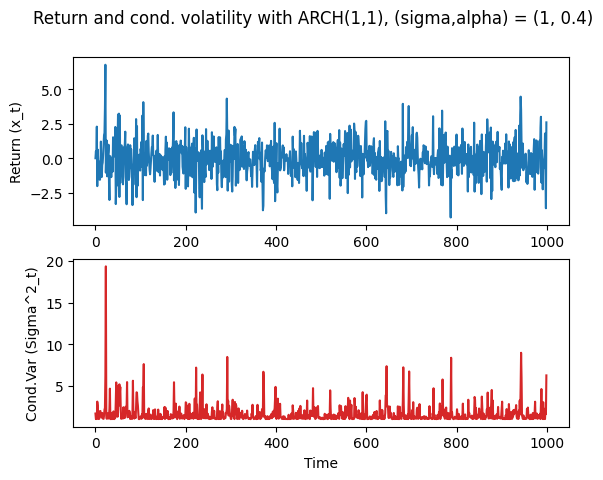

In [4]:
#now plotting our time series 
t = np.arange(0, T, 1) #defines the common x-axis

fig, axs = plt.subplots(2) #defined to subplots stacked above each other
fig.suptitle('Return and cond. volatility with ARCH(1,1), (sigma,alpha) = ('+str(sigma)+', '+str(alpha)+')')

axs[0].plot(t, x, color='tab:blue') #plotting the returns
axs[0].set(ylabel='Return (x_t)')

axs[1].plot(t, sigma2, color='tab:red') #plotting the Cond. var
axs[1].set(xlabel='Time',ylabel='Cond.Var (Sigma^2_t)')

plt.show()

/tmp/ipykernel_45035/2541801201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

<Axes: ylabel='Density'>

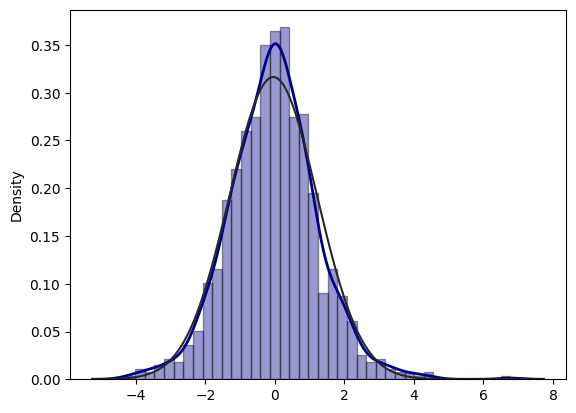

In [5]:
# matplotlib histogram and density
sns.distplot(x, hist=True,fit=norm, kde=True, 
             bins=int(T/25), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

At the current model, We have alpha=0.4, and simga=0.1


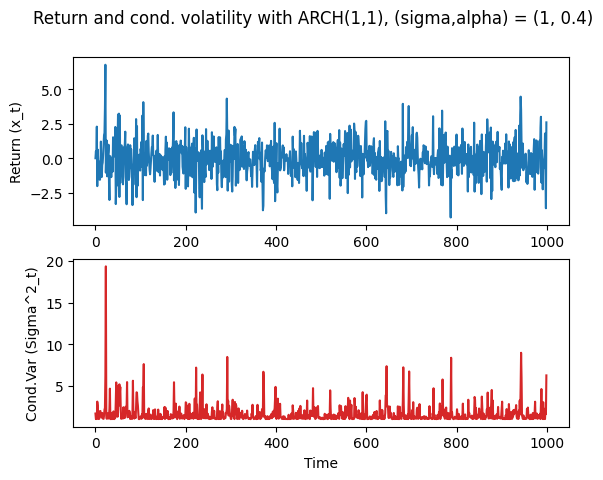

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.4, and simga=0.4


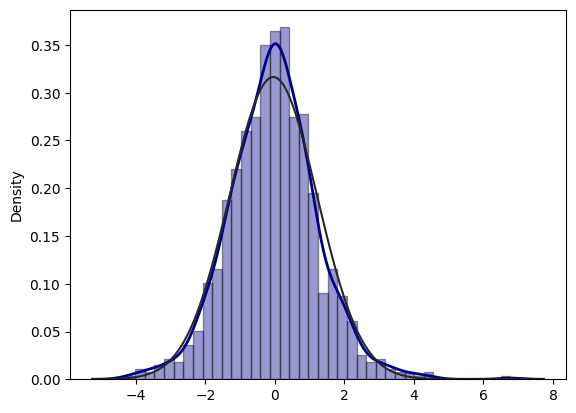

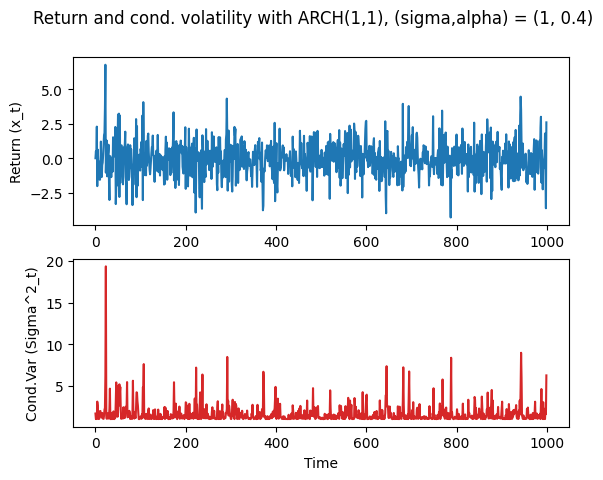

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.4, and simga=0.9


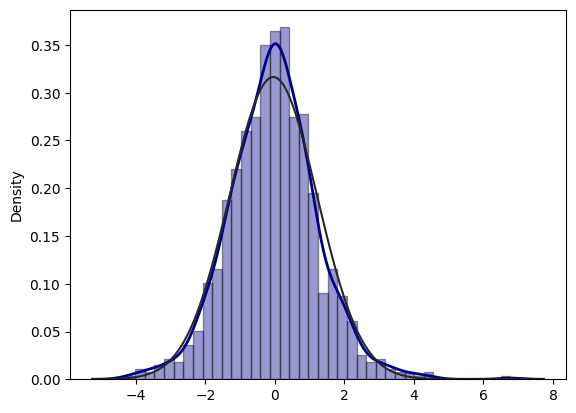

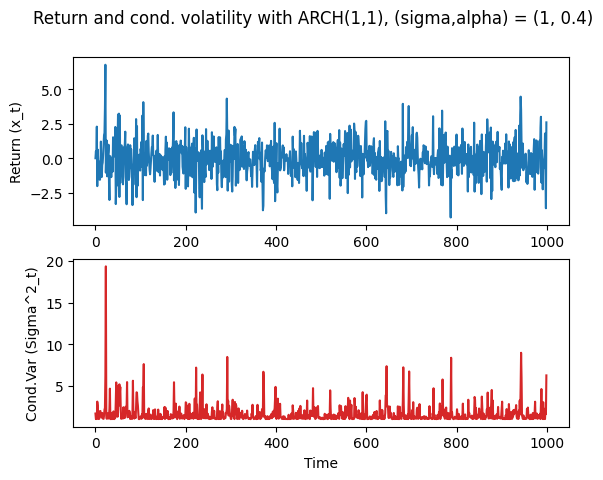

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.4, and simga=1


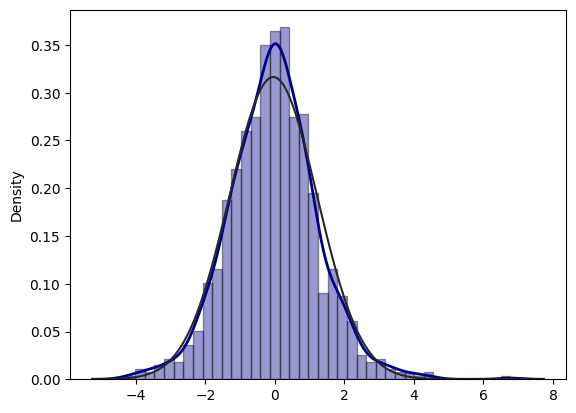

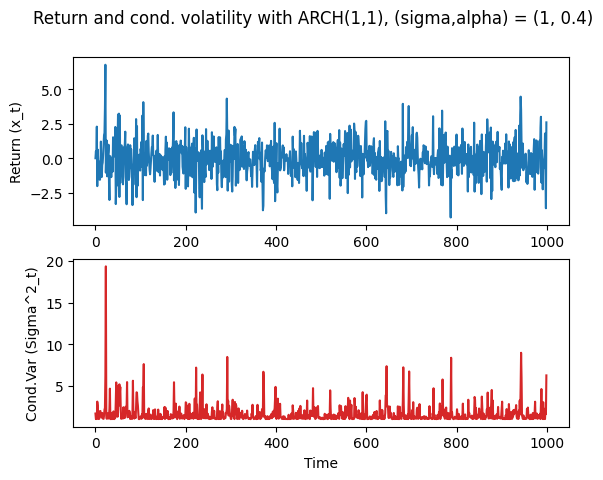

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.4, and simga=1.1


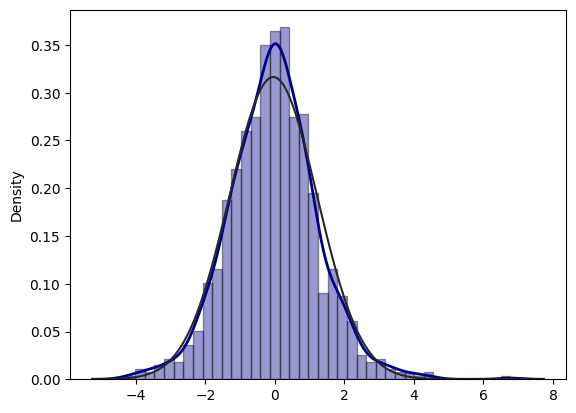

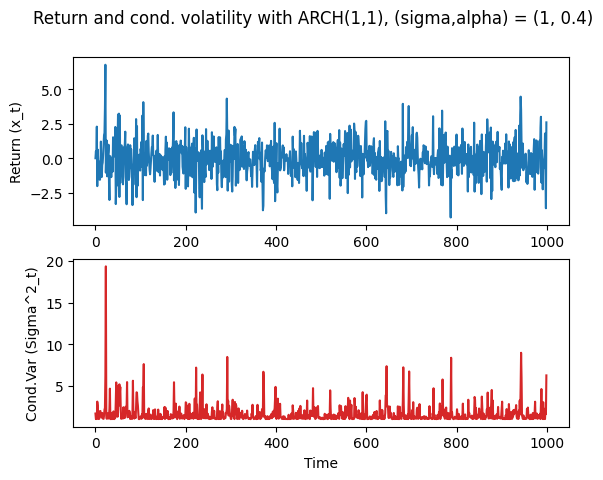

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.4, and simga=2


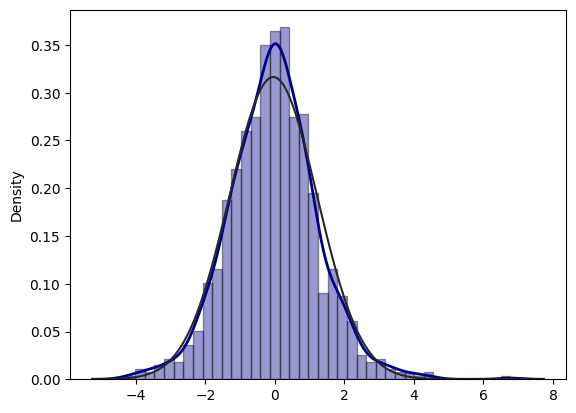

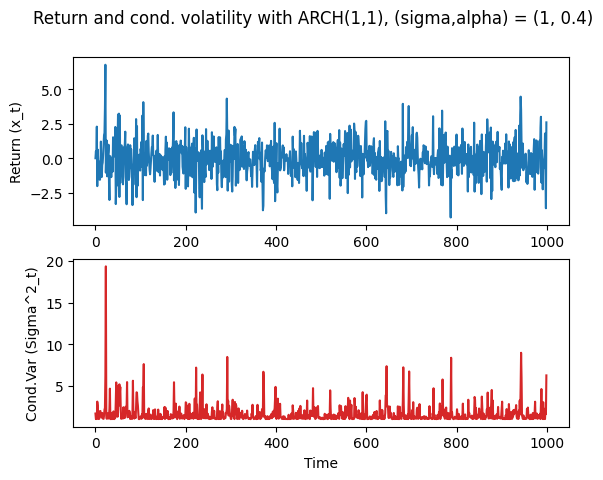

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.4, and simga=3


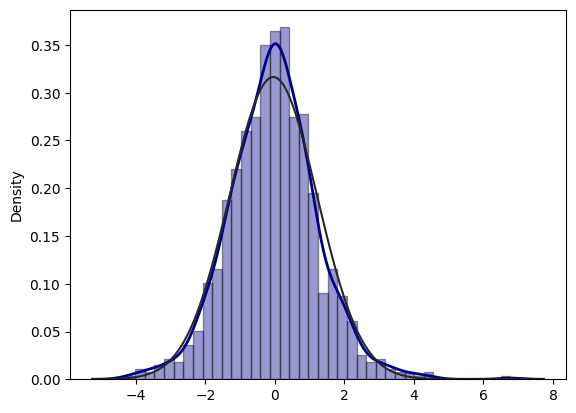

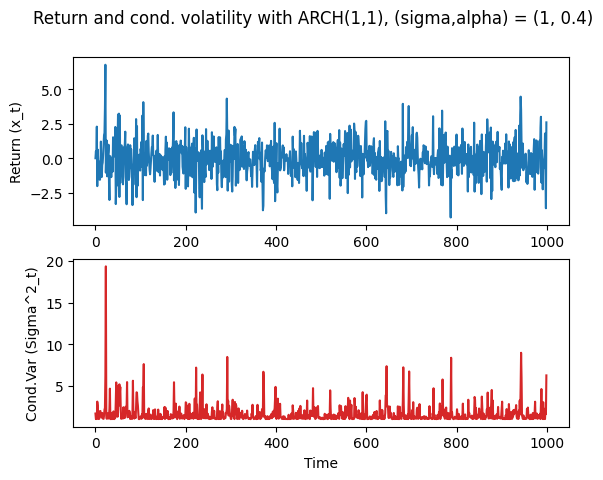

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.9, and simga=0.1


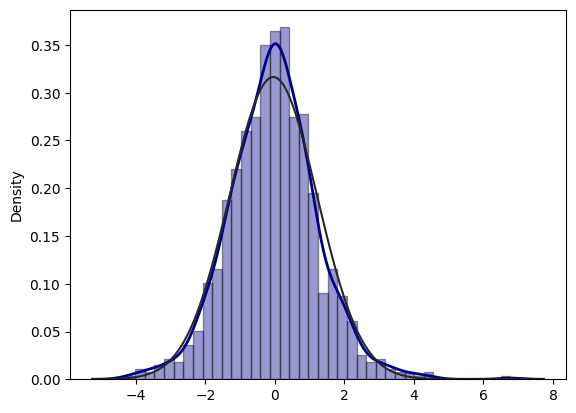

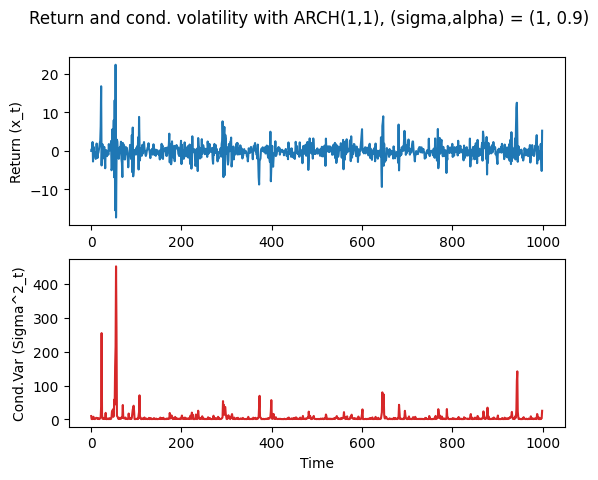

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.9, and simga=0.4


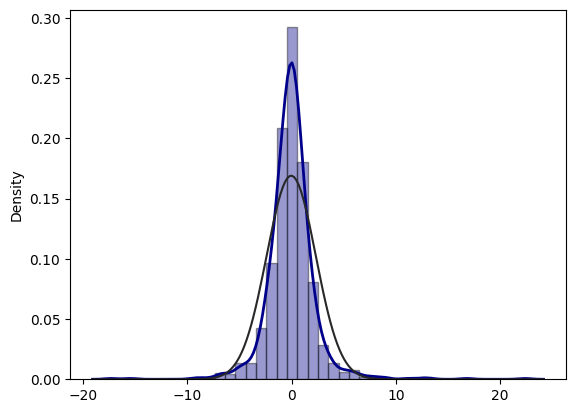

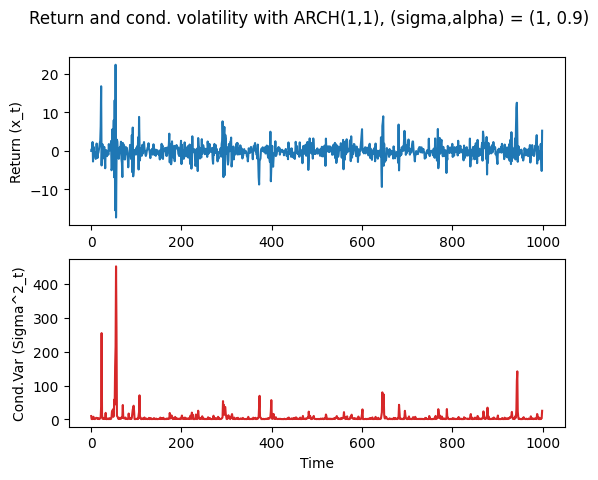

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.9, and simga=0.9


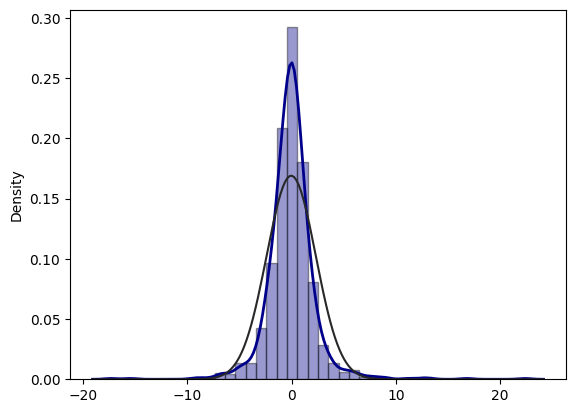

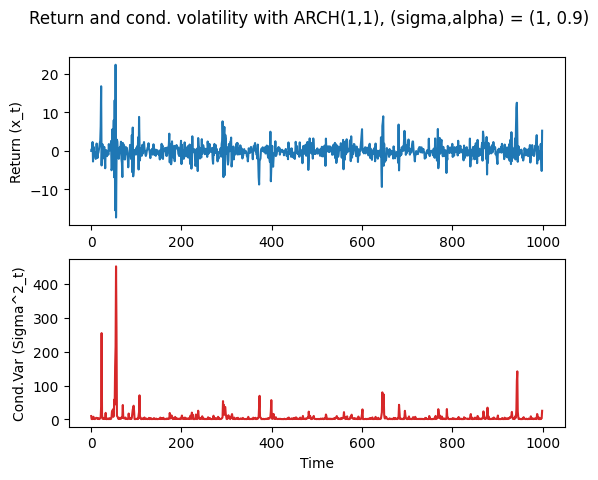

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.9, and simga=1


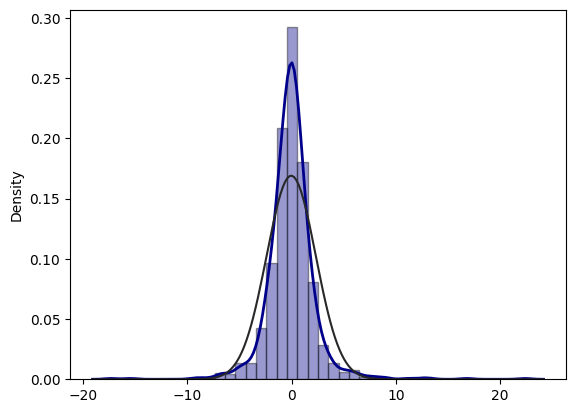

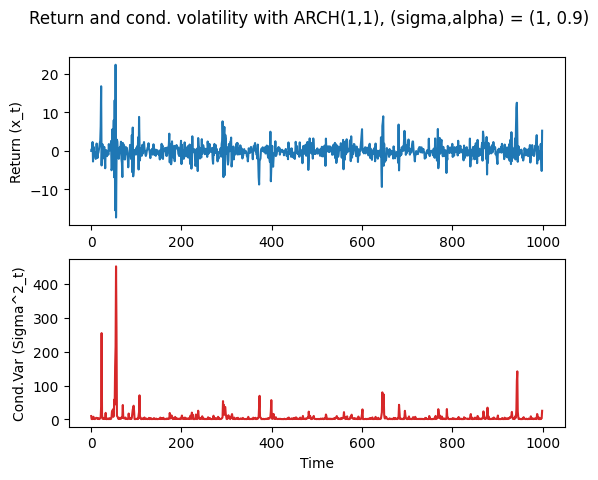

At the current model, We have alpha=0.9, and simga=1.1


/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

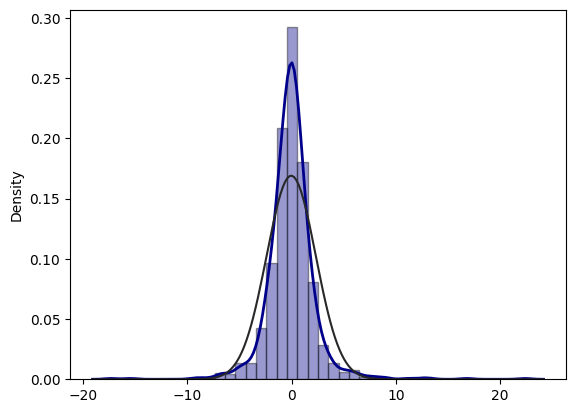

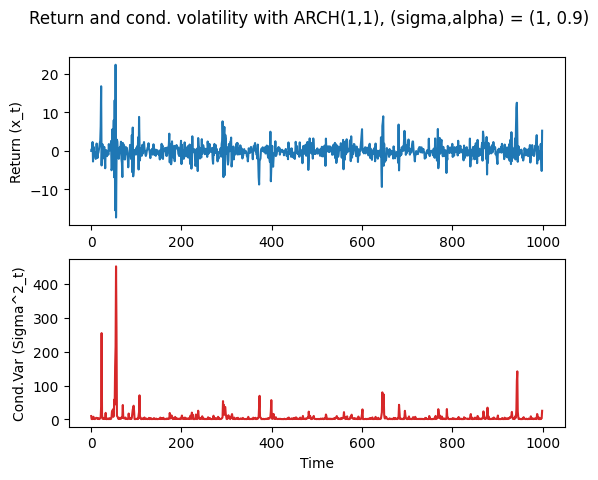

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.9, and simga=2


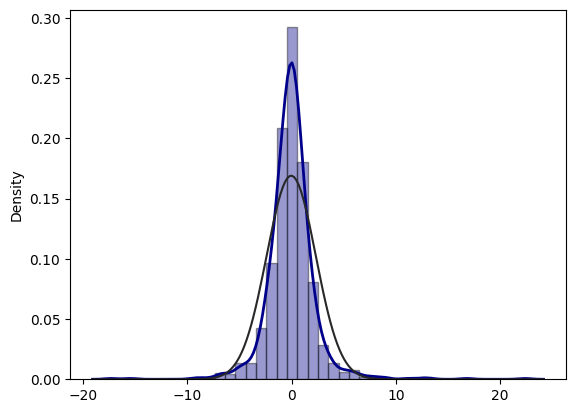

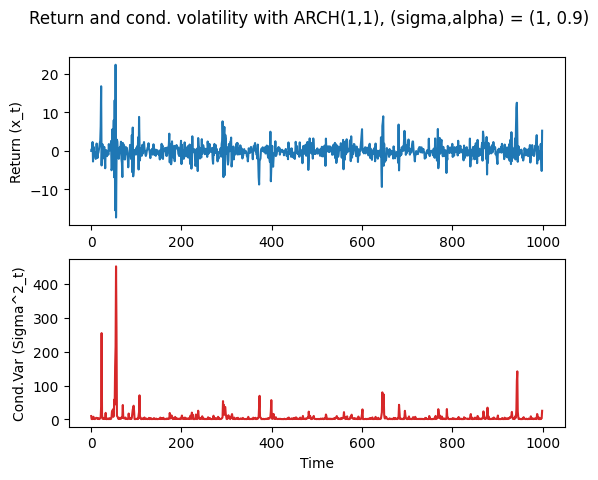

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=0.9, and simga=3


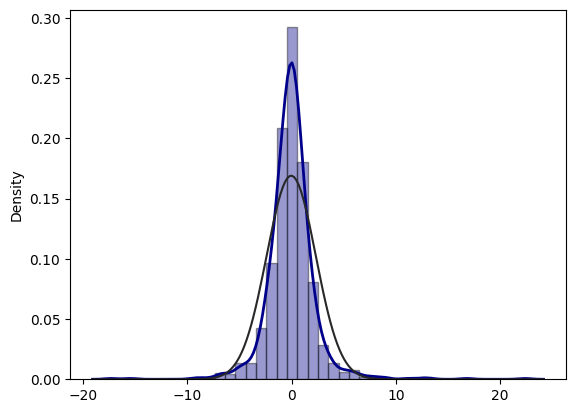

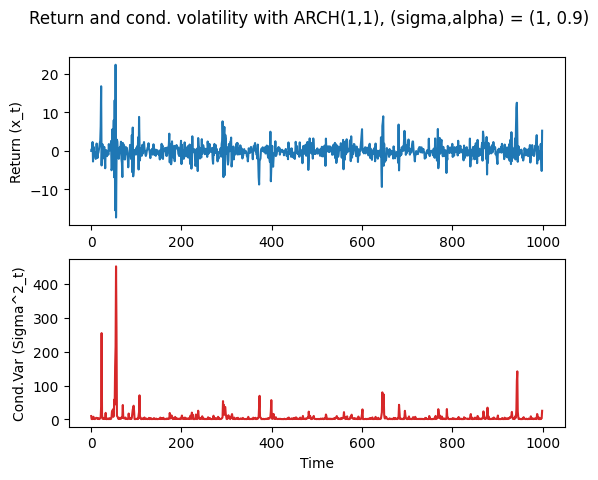

/tmp/ipykernel_45035/293422109.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

At the current model, We have alpha=1, and simga=0.1


ZeroDivisionError: division by zero

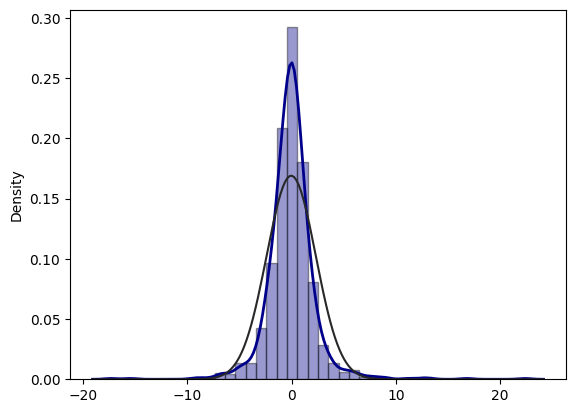

In [6]:
alphas = [0.4,0.9,1,1.1,2,3]
sigmas = [0.1, 0.4, 0.9,1,1.1,2,3]
for alpha in alphas:   #now plotting our time series
    for sigma in sigmas:
        print("At the current model, We have alpha={}, and simga={}".format(alpha,sigma))
        #Defining parameters
        sigma=1
        T=1000
        np.random.seed(1479) #Setting the seed - Funfact what happend in 1479? ;)
        x,sigma2,z=sim_ARCH1N(sigma,alpha, T) #using the function defined above    
        t = np.arange(0, T, 1) #defines the common x-axis
        
        fig, axs = plt.subplots(2) #defined to subplots stacked above each other
        fig.suptitle('Return and cond. volatility with ARCH(1,1), (sigma,alpha) = ('+str(sigma)+', '+str(alpha)+')')
        
        axs[0].plot(t, x, color='tab:blue') #plotting the returns
        axs[0].set(ylabel='Return (x_t)')
        
        axs[1].plot(t, sigma2, color='tab:red') #plotting the Cond. var
        axs[1].set(xlabel='Time',ylabel='Cond.Var (Sigma^2_t)')
        
        plt.show()
        # matplotlib histogram and density
        sns.distplot(x, hist=True,fit=norm, kde=True, 
                     bins=int(T/25), color = 'darkblue', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 2})

Black curve is a standard normal distribution and the blue is a gaussian kernel density estimate.

**Ex 2**

In [7]:
#This function simulates a ARCH(1)-process with t-dist values
#sigma and alpha are the relevant parameters in the modelling of the volatility and nu is the DF in the t-dist
def sim_ARCH1T(sigma, alpha,nu , T):
    
    #Generating T random draws from a std. normal dist.
    z=np.random.standard_t(df=nu, size=T)
    nf=np.sqrt((nu-2)/nu) #inverse std. dev
    z=nf*z
    
    #Define the series x_t and sigma^2_t (sigma2) as empty variables we assign values to later. 
    x=np.empty(T)
    sigma2=np.empty(T)
    
    #Initiating x_0=0 and sigma2_0=1
    sigma2[0]=sigma/(1-alpha) #initiating sigma2 as its long run average  
    x[0]=0
    
    #Simulating the ARCH(1) through a loop
    for t in range(1,T):
        sigma2[t]=sigma+alpha*x[t-1]**2
        x[t]=np.sqrt(sigma2[t])*z[t]
        
    return x,sigma2,z #output is 2 series with returns and cond. variance respectively

In [8]:
#Defining parameters
sigma=1
alpha=0.4
nu=6
T=1000
np.random.seed(1479)
x,sigma2,z=sim_ARCH1T(sigma,alpha,nu, T) #using the function defined above

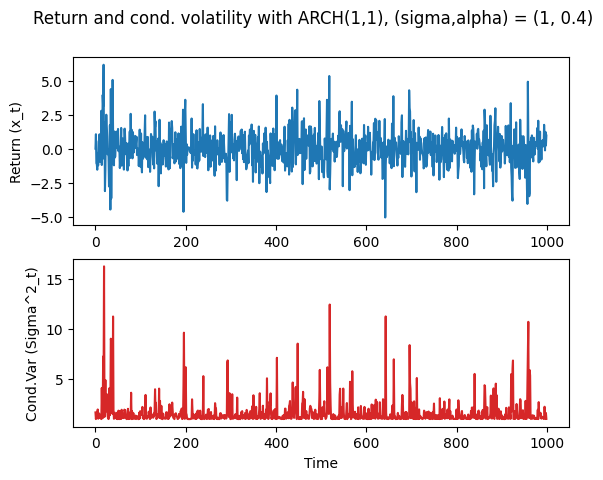

In [9]:
#now plotting our time series 
t = np.arange(0, T, 1) #defines the common x-axis

fig, axs = plt.subplots(2) #defined to subplots stacked above each other
fig.suptitle('Return and cond. volatility with ARCH(1,1), (sigma,alpha) = ('+str(sigma)+', '+str(alpha)+')')

axs[0].plot(t, x, color='tab:blue') #plotting the returns
axs[0].set(ylabel='Return (x_t)')

axs[1].plot(t, sigma2, color='tab:red') #plotting the Cond. var
axs[1].set(xlabel='Time',ylabel='Cond.Var (Sigma^2_t)')

plt.show()

/tmp/ipykernel_45035/3373755863.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True,fit=norm, kde=True,
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

<Axes: ylabel='Density'>

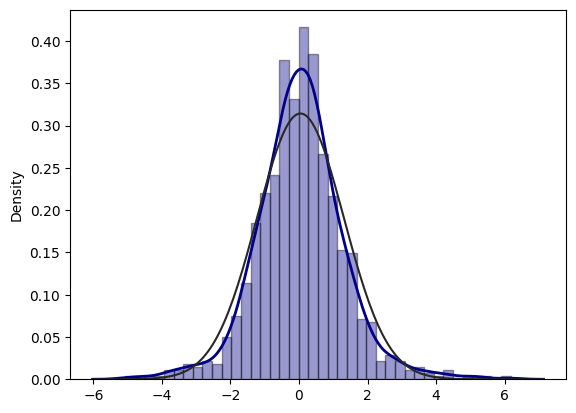

In [10]:
# matplotlib histogram
sns.distplot(x, hist=True,fit=norm, kde=True, 
             bins=int(T/25), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

Black curve is a standard normal distribution and the blue is a gaussian kernel density estimate.

**Additional: Code to show how to store the series of observations $x_t$**

In [11]:
#Lastly we store the values on our computer (these values do we need later)

#Choose folder where you store the CSV file - NOTE: Python does not understand space in file path (Use underscore,_,!!)
#Furthermore use notation 'C:/Users/' for the path
my_folder='Insert your path here xD)'
np.savetxt(my_folder+'ARCH1sim.csv', x, delimiter=',', comments="")